In [21]:
import csv
import matplotlib.pyplot as plt
from numpy import array, vstack, genfromtxt
import numpy as np
from scipy.cluster.vq import kmeans
from scipy.cluster.vq import vq

Fontconfig warning: ignoring UTF-8: not a valid region tag


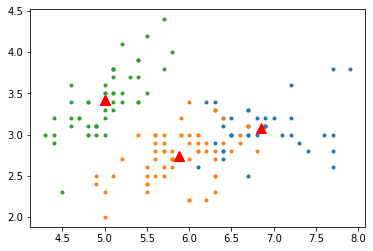

In [23]:
def readData(filename, columns):
    csv = genfromtxt(filename, delimiter=",",
                    usecols=(map(int, columns.split(","))))
    return csv

def writeResult(filename, idx):
    w = open(filename, 'w', encoding="utf-8")
    
    for i in range(len(idx)):
        w.write("{}\n".format(idx[i]))
    w.close()
    
# read dataset from local 
columns = "0,1,2,3"
read_data = readData("iris.data", columns)

# train k-means model
n_clusters = 3
centroids, _ = kmeans(read_data, n_clusters)

# assign data to corresponding cluster and export
idx, _ = vq(read_data, centroids)
writeResult("result.txt", idx)

np.savetxt("iris-centroid.csv", centroids, delimiter=",")

# show the result 
for i in range(n_clusters):
    plt.plot(read_data[idx==i,0], read_data[idx==i,1], 'o', markersize=3)
    plt.plot(centroids[i:,0],centroids[i:,1],'^r', markersize=10)

plt.show()

In [24]:
print(centroids)

[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.418      1.464      0.244     ]]


In [29]:
print(centroids[0:,1])

[3.07692308 2.74098361 3.418     ]
